<a href="https://colab.research.google.com/github/21Ovi/Employee-Performance-Analysis/blob/main/Visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Below code is for getting figure in center alignment
from IPython.core.display import HTML
HTML("""

.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

""")

# Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Avoiding warnings
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [7]:
data = pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls', index_col=0)
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


### Column names

In [8]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

## Data Insight

### Employee Department Analysis

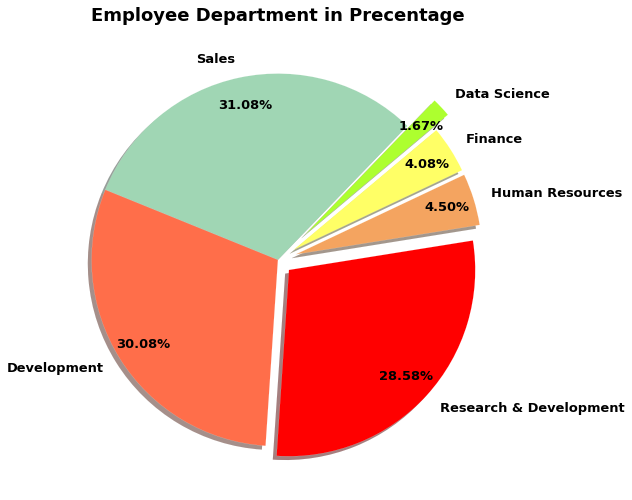

In [9]:
# Pie chart for employee department analysis
percent_1=[]

for i in data.EmpDepartment.value_counts():
  percent_1.append(i)

wedgeprops = {"linewidth": 0.1, "width": 1, "edgecolor":"W"}
plt.figure(figsize = (10, 15))
color = ["#","#","#","#","#","#"]
color = ["#a0d6b4","#ff6e4a","#ff0000","#f4a460","#ffff66","#adff2f"]

plt.pie(percent_1, labels=['Sales', 'Development', 'Research & Development', 'Human Resources', 'Finance', 'Data Science'],
       explode = [0, 0, 0.08, 0.1, 0.1, 0.2],  autopct = "%0.2f%%", startangle = 46, shadow = True, pctdistance = 0.85,
        wedgeprops = wedgeprops,textprops = {"fontsize":13,"fontweight":"bold"},rotatelabels=False, colors = color)
plt.title("Employee Department in Precentage", fontsize=18, fontweight="bold")
plt.tight_layout(pad=6);

Employee Department is classified into 6 parts:

1. **`Sales`** : `31.08%` of employees in this firm are from this department.
2. **`Development`** : In order to run the firm, Development department is responsible to fetch funds. So, `30.08%` of employees belongs from development department.
3. **`Research & Development`** : Research and development (R&D) is when businesses gather knowledge to create new products or discover new ways to improve their existing products and services. R&D is done on products which indicates this this a `product based company`. This department holds `28.58%` of employees.
4. **`Human Resources`** :  The human resource department's mission is to make sure the company's employees are adequately managed, appropriately compensated, and effectively trained. The department is also responsible for recruiting, hiring, firing, and administering benefit.This department have `4.50%` employees.
5. **`Finance`** : Finance Departmnet have`4.08%` employees.This department is the part of an organization that is responsible for acquiring funds for the firm, managing funds within the organization and planning for the expenditure of funds on various assets.
6. **`Data Science`** : This department generate insights which analysts and business users can translate into tangible business value. Its a trending field now-a-days.This department having `1.67%` employees.

## Department wise Performance

In [10]:
# Histogram graph for department wise performance
def customLegend(fig, nameSwap):
    for i, dat in enumerate(fig.data):
        for elem in dat:
            if elem == 'name':
                fig.data[i].name = nameSwap[fig.data[i].name]
    return(fig)
    
fig1 = px.histogram(data, x="EmpDepartment",color="PerformanceRating",barmode='group',
                    color_discrete_sequence=['#cb4154','#ffd700', '#8db600'],
                   labels=dict(EmpDepartment="Employee Department"),
                   title="Department vs Performance Rating",width=990,template="presentation")

fig1.update_layout(title_x=0.5,title_font_size=20,font_size=11,xaxis_showgrid=False, yaxis_showgrid=False,
                   legend=dict(title="Performance Rating"))

fig1 = customLegend(fig=fig1, nameSwap = {'3': 'Excellent', '2':'Good','4':"Outstanding"}) 

fig1.show();

* As shown in above figure, every department employees gives Excellent performance rating more in number.
* More number of employees are avilable in Sales & Development, so their count is high.
* In Development Department, here more number of Outstanding Performance compared to Good Performance of an employees.

## Employees Education Background analysis

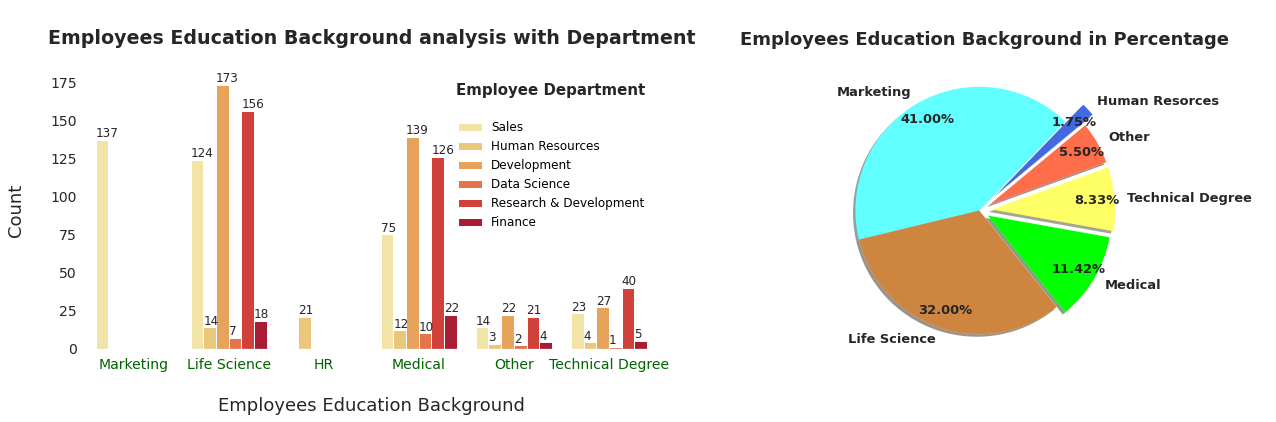

In [11]:
# setting up seaborn for figure
sns.set(rc={"font.size":12,"axes.titlesize":18,"axes.labelsize":18,"xtick.labelsize":14,"ytick.labelsize":14,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'white'})

# pie chart for employees education background
percent_2=[]
for i in data['EducationBackground'].value_counts():
    percent_2.append(i)
    
wedgeprops = {"linewidth": 0.1, 'width':1, "edgecolor":"w"}
color = ["#61ffff","#cd853f","#00ff00","#ffff66","#ff6e4a","royalblue"]

plt.figure(figsize = (20,8))

plt.subplot(1,2,1)

# countplot chart for employees education background for department analysis
ax = sns.countplot(x=data['EducationBackground'],hue=data["EmpDepartment"],palette="YlOrRd")
plt.title("\nEmployees Education Background analysis with Department\n",fontweight="bold",fontsize=19)
plt.xlabel("\nEmployees Education Background")
plt.xticks(ticks=[0,1,2,3,4,5],labels=["Marketing","Life Science","HR","Medical","Other","Technical Degree"], color="darkgreen")
plt.ylabel("Count\n")
legend = plt.legend()
legend.set_title("Employee Department\n",prop={"size":15,"weight":"bold"})
plt.setp(legend.get_texts(), color='black')
legend.draw_frame(False)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+2))
plt.tight_layout(pad=2)

plt.subplot(1,2,2)
plt.pie(percent_2,labels = ["Marketing","Life Science","Medical","Technical Degree","Other","Human Resorces"],
        explode = [0,0,0.08,0.1,0.1,0.2], autopct = "%0.2f%%", startangle =46,shadow = True,
        pctdistance = 0.85,wedgeprops = wedgeprops,textprops = {"fontsize":13,"fontweight":"bold"},rotatelabels=False,
        colors = color) 
plt.title("Employees Education Background in Percentage\n",fontsize=18,fontweight='bold',)
plt.tight_layout(pad=7)
plt.axis('equal')
plt.show()

* Most of the Employees education background is `Marketing` around `41%` after that `Life Science, Medical` with `32% & 11.42%` respectively.
* Employees whose education background are `HR & Other` are least in number around `1.75% & 5.50%` respectively.
* Employees whose education background are `Life Science` are worked in `Development`,`Sales` and `Research & Development` ` Department employee` count are `173,124 & 156` respectively.
* From above data visualization, its look like company hire people whose education background are `Marketing & Life Science`.
* Conclusion is that Company developed a `Life Science product` as most of the employees education background are `Life Science & Medical`. 

## Maretial Status Analysis with other Features

In [12]:
pd.crosstab(data.OverTime, data.MaritalStatus, margins=True)

MaritalStatus,Divorced,Married,Single,All
OverTime,,,,
No,183,390,274,847
Yes,85,158,110,353
All,268,548,384,1200


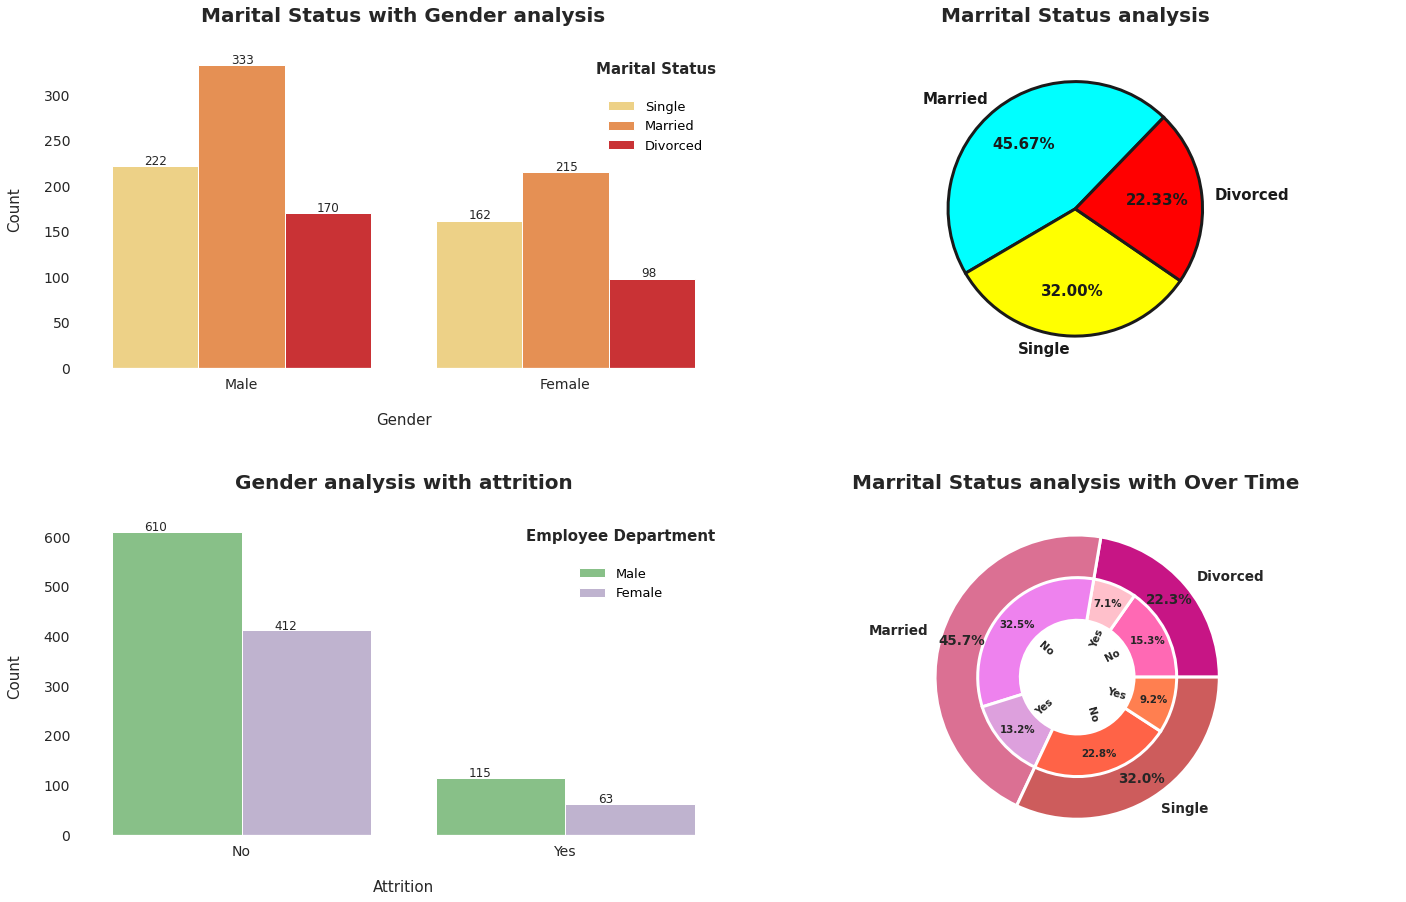

In [13]:
# Setting up for seaborn figures
sns.set(rc={"font.size":12,"axes.titlesize":18,"axes.labelsize":15,"xtick.labelsize":14,"ytick.labelsize":14,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'white'})

# pie chart data
percent_2=[]
for i in data['MaritalStatus'].value_counts():
    percent_2.append(i)

percent_3=[]
for i in data['OverTime'].value_counts():
    percent_3.append(i)
    
wedgeprops = {"linewidth": 3, 'width':1, "edgecolor":"k"}
color = ["cyan","yellow","red"]

plt.figure(figsize = (20,13))

plt.subplot(2,2,1)

# countplot for gender vs Marital Status
ax = sns.countplot(x=data['Gender'],hue=data["MaritalStatus"],palette="YlOrRd")
plt.title("Marital Status with Gender analysis\n",fontweight="bold",fontsize=20)
plt.xlabel("\nGender")
plt.ylabel("Count\n")
legend = plt.legend(prop={"size":13})
legend.set_title("Marital Status\n",prop={"size":15,"weight":"bold"})
plt.setp(legend.get_texts(), color='black')
legend.draw_frame(False)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))


# pie chart for Marital Status analysis
plt.subplot(2,2,2)
plt.pie(percent_2,labels=["Married","Single","Divorced"],
        explode = [0,0,0], autopct = "%0.2f%%", startangle =46,
        pctdistance = 0.65,wedgeprops = wedgeprops,textprops = {"fontsize":15,"fontweight":"bold",'color':"k"},
        rotatelabels=False,
        colors = color) 
plt.title("Marrital Status analysis\n",fontsize=20,fontweight='bold',)

# countplot for gender vs attrition
plt.subplot(2,2,3)
ax = sns.countplot(x= data["Attrition"],hue=data['Gender'],palette="Accent")
plt.title("\nGender analysis with attrition\n",fontweight="bold",fontsize=20)
plt.xlabel("\nAttrition")
plt.ylabel("Count\n")
legend = plt.legend(prop={"size":13})
legend.set_title("Employee Department\n",prop={"size":15,"weight":"bold"})
plt.setp(legend.get_texts(), color='black')
legend.draw_frame(False)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))
plt.tight_layout(pad=2)

# donut chart for Marrital Status analysis with Over Time
plt.subplot(2,2,4)
plt.title("\nMarrital Status analysis with Over Time\n",fontsize=20,fontweight="bold")
plt.pie([268,548,384], radius=1,
        colors=['mediumvioletred', 'palevioletred','indianred','lightcoral',"#FFB600"],
        labels=["Divorced","Married","Single"], 
        autopct='%.1f%%',
        pctdistance=0.85, textprops = {"fontsize":13.5,"fontweight":"bold"},
        wedgeprops=dict(width=0.6, edgecolor='white',linewidth=3))

plt.pie([183,85,390,158,274,110], radius=0.7,
        colors=['hotpink','pink', 'violet',
                'plum', 'tomato','coral', 'salmon','lightsalmon',"#e17701","#fdaa48"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=3),textprops = {"fontsize":10.3,"fontweight":"bold"},
         labels=["No","Yes","No","Yes","No","Yes"],autopct='%.1f%%',
        pctdistance=0.8, labeldistance=0.3, rotatelabels=True)


plt.axis('equal')
plt.show();

**Key Points**

1. `45.67%` of Employees are `Married`.
2. `32%` of Employees are `Single`.
3. `22.33%` of Employees are `Divorced`.

* The majority of employees are `Male`.
* Mostly `male` employees are doing attrition with company compare to `felame` employees.
* In `Over Time` analysis, it is observerd that only `29.5%` of employees are doing `Over Time` in which:
> * `13.2%` of employees are `Married`
> * `7.1%` of employees are `Divorced`
> * `9.2%` of employees are `Single`

## Job role analysis with Employee Department

In [14]:
# histogram chart for Job Role vs Employee Department
fig3 = px.histogram(data, y="EmpJobRole",color="EmpDepartment",barmode='group',
                   labels=dict(EmpDepartment="Employee Department",EmpJobRole="Job Role"),
                   title="Job Role vs Employee Department",width=1000,height=700,template="ggplot2")
fig3.update_layout(title_x=0.5,title_font_size=22,font_size=13,xaxis_showgrid=False, yaxis_showgrid=False,
                  plot_bgcolor='white')
fig3.show()

### Job types respect to department

There are `Three` types of roles in `Sale Department`:
1. Manager
2. Sale Representative
3. Sale Executive

There are `Two` types of roles in `Human Resources Department`:
1. Manager
2. Human Resources (Majority of employees)

There are `Six` types of roles in `Development Department`:
1. Developer (Majority of employees)
2. Senior Developer
3. Technical Architect
4. Business Analysit
5. Technical Lead
6. Delivery Manager

There are `One` types of roles in `Data Science Department`:
1. Data Scientists

There are `Eight` types of roles in `R&D Department`:
1. Manager R&D (Majority of employees)
2. Research Director
3. Health Representative
4. Research Scientist
5. Manufacturing Director
6. Laboratory Technition
7. Senior Manager R&D
8. Manager

There are `One` types of roles in `Finance Department`:
1. Finance Manager


## Hourly Rate Performance analysis

In [15]:
# histogram chart for Hourly Rate vs Performance Rating
fig4 = px.histogram(data, x="EmpHourlyRate",color="PerformanceRating",barmode='group',
                color_discrete_sequence=['#a6e7ff','#e3f988', '#f4bbff'],
                   labels=dict(EmpHourlyRate="Hourly Rate"),
                   title="Hourly Rate vs Performance Rating",width=1000,template="plotly")

fig4.update_layout(title_x=0.5,title_font_size=22,font_size=13,legend=dict(title="Performance Rating"),
                   paper_bgcolor="white",plot_bgcolor='white')

fig4 = customLegend(fig=fig4, nameSwap = {'3': 'Excellent', '2':'Good','4':"Outstanding"})

fig4.show();

* The employees hourly rate lies in between `80-84` are more in number & they give `Excellent` Performance.
* The employees hourly rate lies in between `85-89`, they gave `Outstanding` Performance in count compare to other Hourly rate employees.
* In simple term, company have `good employees`.



## Department vs Last Salary Hike Percent

In [16]:
# histogram chart for Department vs Last Salary Hike Percent
fig5 = px.histogram(data, x="EmpDepartment",color="EmpLastSalaryHikePercent",barmode='group',
                   labels=dict(EmpHourlyRate="Hourly Rate"),
                   title="Department vs Last Salary Hike Percent",width=900,height=400,template="plotly")
fig5.update_layout(title_x=0.5,title_font_size=20,font_size=10,legend=dict(title="Salary Hike Percent"),
                   paper_bgcolor="white",plot_bgcolor='white')

fig5.show();

* In `Sales Department`, more number of employees last salary hike was `14%` & only `3 employees` their last salary hike was `25%`.
* In `Development Department`,more number of employees last salary hike was `13%` & only `3 employees` their last salary hike was `25%`.
* In `Research & Development` Department,more number of employees last salary hike was `14%` & `6 employees` their last salary hike was `25%`.
* In `HR Department`,more number of employees last salary hike was `11%` & only `1 employee` his last salary hike was `23%`.
* In `Finance Department`,more number of employees last salary hike was `12%` & only `1 employee` his last salary hike was `25%`.
* In `Data Science` Department,more number of employees last salary hike was `19%` & only `1 employee` his last salary hike was `23%`.

**Note** : Highest Salary Hike Percent is `25%` & Lowest Salary Hike Percent is `11%`.


## Age Analysis

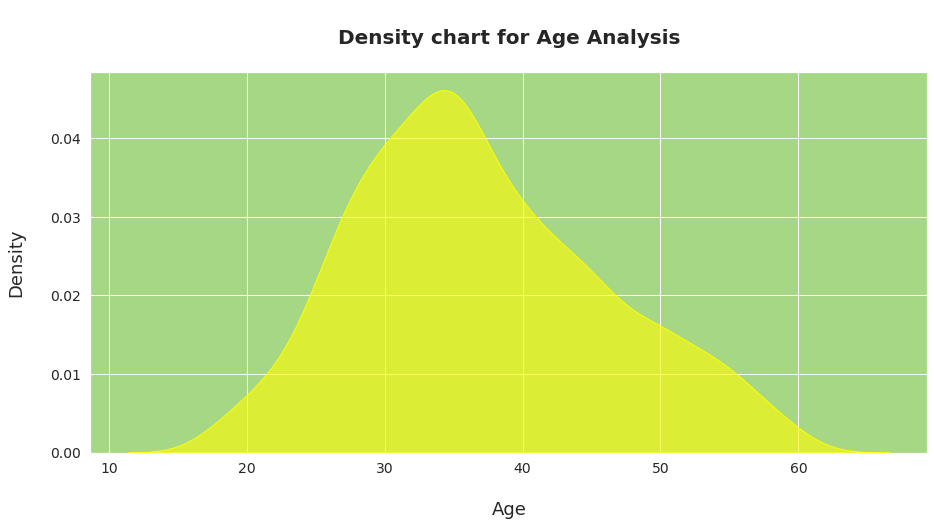

In [17]:
# Setting up for seaborn figures
sns.set(rc={"font.size":12,"axes.titlesize":18,"axes.labelsize":18,"xtick.labelsize":14,"ytick.labelsize":14,
            "legend.fontsize":12,'axes.grid' : True,'axes.facecolor':'#A6D785'})


# Density chart
plt.figure(figsize=(15,7))
sns.kdeplot(data['Age'], fill=True,alpha=0.6,color="yellow")

plt.xlabel("\nAge")
plt.ylabel("Density\n")
plt.title('\nDensity chart for Age Analysis\n',fontsize=20,fontweight="bold")
plt.show();

* The age distribution is starting from `18 to 60` where the most of the employees are lying between `30 to 40` age count.

## Employee Satisfaction with Performance Analysis

In [18]:
# Crosstab is used for getting accurate info for plottinf pie chart
pd.crosstab(data['PerformanceRating'], data['PerformanceRating'], margins=True)

PerformanceRating,2,3,4,All
PerformanceRating,,,,
2,194,0,0,194
3,0,874,0,874
4,0,0,132,132
All,194,874,132,1200


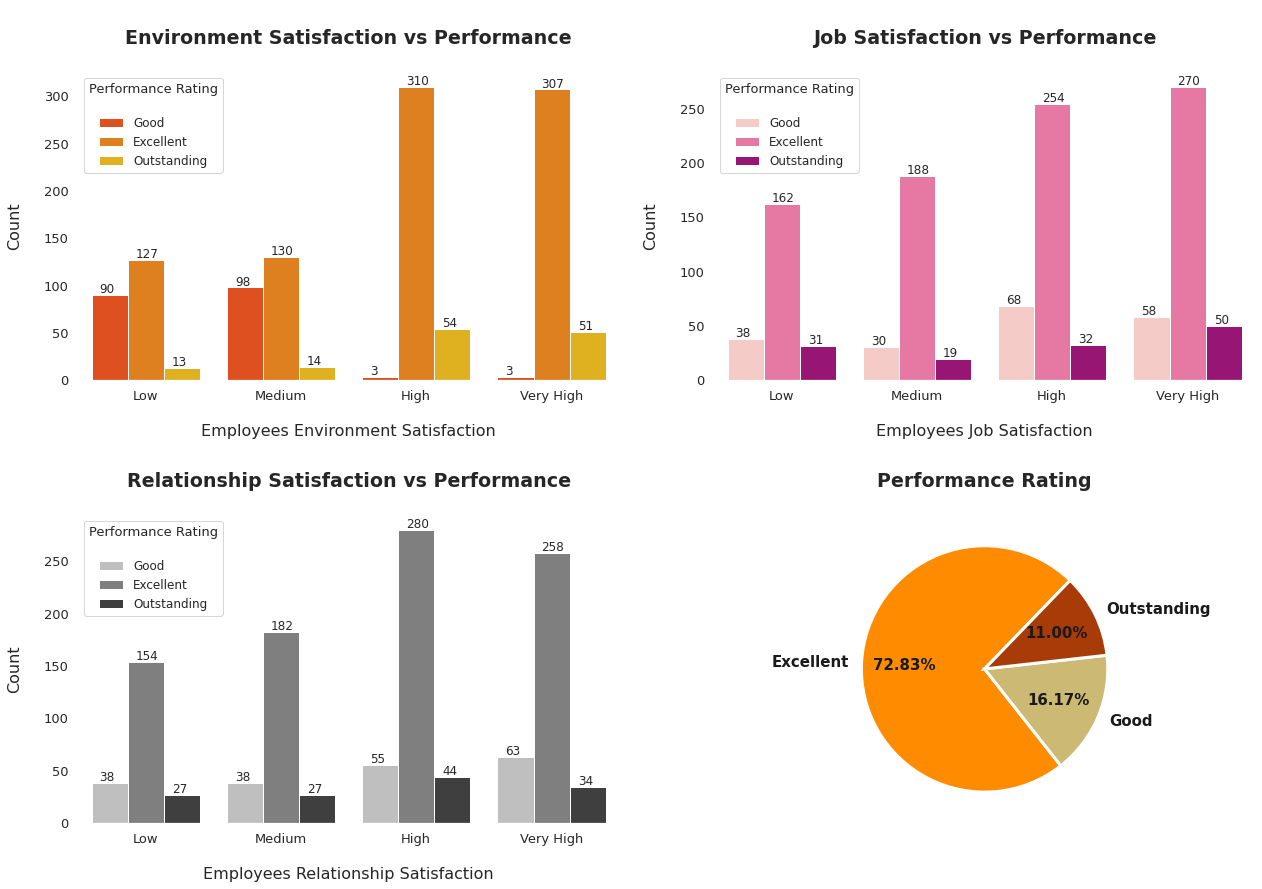

In [21]:
# setting up for seaborn figures
sns.set(rc={"font.size":12,"axes.titlesize":18,"axes.labelsize":16,"xtick.labelsize":13,"ytick.labelsize":13,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'white'})

# pie chart data
percent_4=[]
for i in data['PerformanceRating'].value_counts():
    percent_4.append(i)

wedgeprops = {"linewidth": 3, 'width':1, "edgecolor":"w"}
color = ["darkorange","y","#a83c09"]


plt.figure(figsize=(18,12))

# Countplot for Environment Satisfaction vs Performance
plt.subplot(2,2,1)
ax = sns.countplot(x=data['EmpEnvironmentSatisfaction'],hue= data["PerformanceRating"],palette='autumn')
plt.title("\nEnvironment Satisfaction vs Performance\n",fontweight="bold",fontsize=19)
plt.xticks(ticks=[0,1,2,3],labels=["Low","Medium","High","Very High"])
plt.xlabel("\nEmployees Environment Satisfaction\n\n\n")
plt.ylabel("Count\n")
legend = plt.legend(
           loc=2,  
           labels=["Good","Excellent","Outstanding"])
legend.set_title("Performance Rating\n",prop={"size":13})
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))

plt.tight_layout(pad=20)

# Countplot for Job Satisfaction vs Performance
plt.subplot(2,2,2)
ax = sns.countplot(x=data['EmpJobSatisfaction'],hue= data["PerformanceRating"],palette='RdPu')
plt.title("\nJob Satisfaction vs Performance\n",fontweight="bold",fontsize=19)
plt.xticks(ticks=[0,1,2,3],labels=["Low","Medium","High","Very High"])
plt.xlabel("\nEmployees Job Satisfaction")
plt.ylabel("Count\n")
legend = plt.legend(
           loc=2,  
           labels=["Good","Excellent","Outstanding"])
legend.set_title("Performance Rating\n",prop={"size":13})
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))

plt.tight_layout(pad=2)
   
# countplot for Relationship Satisfaction vs Performance
plt.subplot(2,2,3)
ax = sns.countplot(x=data['EmpRelationshipSatisfaction'],hue= data["PerformanceRating"],palette='gist_gray_r')
plt.title("\nRelationship Satisfaction vs Performance\n",fontweight="bold",fontsize=19)
plt.xticks(ticks=[0,1,2,3],labels=["Low","Medium","High","Very High"])
plt.xlabel("\nEmployees Relationship Satisfaction")
plt.ylabel("Count\n")
legend = plt.legend(
           loc=2,  
           labels=["Good","Excellent","Outstanding"])
legend.set_title("Performance Rating\n",prop={"size":13})
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))

# pie chart for Performance Rating    
plt.subplot(2,2,4)
plt.pie(percent_4,labels=["Excellent","Good","Outstanding"],
        explode = [0,0,0], autopct = "%0.2f%%", startangle =46,
        pctdistance = 0.65,wedgeprops = wedgeprops,textprops = {"fontsize":15,"fontweight":"bold",'color':"k"},
        rotatelabels=False,
        colors = color) 
plt.title("Performance Rating\n",fontsize=19,fontweight='bold',)

        
plt.show();

## Company have

1. Excellent employees : `72.83%`.
2. Good employees : `16.17%`.
3. Excellent employees : `11.00%`.

* Employees Satisfaction are classified into four types i.e. `Low, Medium, High & Very High`.
* More Number of employee whose environment satisfaction are `High & Very High` in number.
* So, employees who belongs from `High & Very High` from each satisfaction columns gives `Excellent & Outstanding performance`.
* In employees environment satisfaction columns, company have low employees who gives feedback like `Low & Medium`.
* While some of the employees who gives feedback like `Low & Medium` from Job Satisfaction & Relationship Satisfaction columns, such employees gives `Excellent performance` more in number. So company should focus on them.
